#Part A. Environment setup and library import

In [10]:
#Step 2. Import the required libraries by executing the following code:

#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
import math
warnings.filterwarnings('ignore')

In [11]:
#Step 3. Verify installation by checking library versions:
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
import sklearn
print("Scikit-learn version:", sklearn.__version__)

NumPy version: 2.0.2
Pandas version: 2.2.2
Scikit-learn version: 1.6.1


#Part B. Manual Computation Exercise

In [12]:
 """ Step 4. Consider the following scenario for a loan approval model.
 A logistic regression has been trained with the following
 parameters:
 beta_0 (intercept) = -3.5
 beta_1 (income coefficient) = 2.0
 beta_2 (credit score coefficient) = 1.5
 A loan applicant has:
 x_1 (normalized income) = 0.8
 x_2 (normalized credit score) = 0.7 """

 beta_0 = -3.5
 beta_1 = 2.0
 beta_2 = 1.5

 x_1 = 0.8
 x_2 = 0.7

In [13]:
# Step 5. Compute the linear predictor (log-odds)

z = beta_0 + beta_1*x1 + beta_2*x2

print(z)

-0.8500000000000001


In [14]:
# Step 6. Compute the predicted probability using the sigmoid function:

p = 1 / (1 + math.e**(-z))

print(p)

0.29943285752602705


In [15]:
# Step 7. Make the classification decision:

decision = "Approve" if p >= 0.5 else "Reject"
print("Decision")

Decision


In [16]:
#Step 8. Calculate the odds:

odds = p / (1 - p)

print(odds)

0.42741493194872665


In [17]:
#Step 9. Calculate odds ratios for interpretation:

OR_1 = np.exp(beta_1)
OR_2 = np.exp(beta_2)

print(OR_1, OR_2)

7.38905609893065 4.4816890703380645


In [18]:
#Step 10. Complete the following table for different applicants:

data = {
    "Applicant": ["A", "B", "C", "D"],
    "x1" : [0.8, 0.9, 0.5, 0.6],
    "x2": [0.7, 0.9, 0.5, 0.8],
    "z": [-0.85, None, None, None],
    "p":[0.2994, None, None, None],
    "odds": [0.4274, None, None, None],
    "threshold": ["Reject", None, None, None]
}

df = pd.DataFrame(data)

# Fill in missing values for applicants B, C, D
for i in range(1, len(df)):
    x_1 = df.loc[i, "x1"]
    x_2 = df.loc[i, "x2"]

    z = beta_0 + beta_1 * x_1 + beta_2 * x_2
    p = 1 / (1 + np.exp(-z))
    odds = p / (1 - p)
    decision = "Approve" if p >= 0.5 else "Reject"

    df.loc[i, "z"] = z
    df.loc[i, "p"] = p
    df.loc[i, "odds"] = odds
    df.loc[i, "threshold"] = decision

df.round(4)

,Applicant,x1,x2,z,p,odds,threshold
0,A,0.8,0.7,-0.85,0.2994,0.4274,Reject
1,B,0.9,0.9,-0.35,0.4134,0.7047,Reject
2,C,0.5,0.5,-1.75,0.1480,0.1738,Reject
3,D,0.6,0.8,-1.10,0.2497,0.3329,Reject


# PART C: PYTHON IMPLEMENTATION WITH SCIKIT-LEARN

In [19]:
#Step 11. reate the training data using NumPy arrays:

X_train = np.array([
    [0.9, 0.8], # Applicant 1: High income, good credit
    [0.3, 0.2], # Applicant 2: Low income, poor credit
    [0.7, 0.7], # Applicant 3: Good income, good credit
    [0.2, 0.3], # Applicant 4: Low income, low credit
    [0.8, 0.6], # Applicant 5: High income, fair credit
    [0.4, 0.4], # Applicant 6: Fair income, fair credit
    [0.6, 0.9], # Applicant 7: Fair income, excellent credit
    [0.1, 0.5]  # Applicant 8: Very low income, fair credit
])

y_train = np.array([1, 0, 1, 0, 1, 0, 1, 0])

print("Feature matrix shape:", X_train.shape)
print("Target vector shape:", y_train.shape)
print("\nClass distribution:")
print(" Class 0 (Rejected):", np.sum(y_train == 0))
print(" Class 1 (Approved):", np.sum(y_train == 1))

Feature matrix shape: (8, 2)
Target vector shape: (8,)

Class distribution:
 Class 0 (Rejected): 4
 Class 1 (Approved): 4


In [20]:
#Step 12. Create and configure the Logistic Regression Model:

log_reg = LogisticRegression(
    C = 1.0,
    solver = 'lbfgs',
    max_iter = 1000,
    random_state = 42
)

In [21]:
#Step 13. Train the Logistic regression model:

log_reg.fit(X_train, y_train)

print("Learned coefficients:")
print(" beta_1 (income):", log_reg.coef_[0][0])
print(" beta_2 (credit):", log_reg.coef_[0][1])
print(" beta_0 (intercept):", log_reg.intercept_[0])

Learned coefficients:
 beta_1 (income): 0.8200250090174888
 beta_2 (credit): 0.6587891320803287
 beta_0 (intercept): -0.7722641768700722


In [22]:
#Step 14. Calculate and display odds ratios:

odds_ratios = np.exp(log_reg.coef_[0])

print("\nOdds Ratios:")
print(" OR for income (x_1):", odds_ratios[0])
print(" OR for credit (x_2):", odds_ratios[1])

print("\nInterpretation:")
print(f" A 1-unit increase in income multiplies odds by {odds_ratios[0]:.3f}")
print(f" A 1-unit increase in credit multiplies odds by {odds_ratios[1]:.3f}")


Odds Ratios:
 OR for income (x_1): 2.2705566212126
 OR for credit (x_2): 1.932450974258097

Interpretation:
 A 1-unit increase in income multiplies odds by 2.271
 A 1-unit increase in credit multiplies odds by 1.932


In [23]:
#Step 15. Generate predicted probabilities:

y_prob = log_reg.predict_proba(X_train)

print("\nPredicted Probabilities:")

print(" Column 0 = P(y=0), Column 1 = P(y=1)")

for i in range(len(X_train)):
    print(
        f"Sample {i+1}: "
        f"P(Reject)={y_prob[i,0]:.4f}, "
        f"P(Approve)={y_prob[i,1]:.4f}"
    )


Predicted Probabilities:
 Column 0 = P(y=0), Column 1 = P(y=1)
Sample 1: P(Reject)=0.3792, P(Approve)=0.6208
Sample 2: P(Reject)=0.5974, P(Approve)=0.4026
Sample 3: P(Reject)=0.4346, P(Approve)=0.5654
Sample 4: P(Reject)=0.6012, P(Approve)=0.3988
Sample 5: P(Reject)=0.4307, P(Approve)=0.5693
Sample 6: P(Reject)=0.5451, P(Approve)=0.4549
Sample 7: P(Reject)=0.4225, P(Approve)=0.5775
Sample 8: P(Reject)=0.5893, P(Approve)=0.4107


In [24]:
#Step 16. Make class predictions and evaluate accuracy:

# Generate class predictions
y_pred = log_reg.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print("\nTraining accuracy:", accuracy * 100, "%")

# Display predictions vs actual
print("\nSample-by-sample results:")
for i in range(len(y_train)):
    status = "Correct" if y_train[i] == y_pred[i] else "INCORRECT"
    print(
        f"Sample {i+1}: "
        f"Actual={y_train[i]}, "
        f"Predicted={y_pred[i]}, "
        f"P(y=1)={y_prob[i,1]:.4f} -> {status}"
    )


Training accuracy: 100.0 %

Sample-by-sample results:
Sample 1: Actual=1, Predicted=1, P(y=1)=0.6208 -> Correct
Sample 2: Actual=0, Predicted=0, P(y=1)=0.4026 -> Correct
Sample 3: Actual=1, Predicted=1, P(y=1)=0.5654 -> Correct
Sample 4: Actual=0, Predicted=0, P(y=1)=0.3988 -> Correct
Sample 5: Actual=1, Predicted=1, P(y=1)=0.5693 -> Correct
Sample 6: Actual=0, Predicted=0, P(y=1)=0.4549 -> Correct
Sample 7: Actual=1, Predicted=1, P(y=1)=0.5775 -> Correct
Sample 8: Actual=0, Predicted=0, P(y=1)=0.4107 -> Correct


In [25]:
#Step 17.Generate confusion matrix and classification report:

# Compute confusion matrix
cm = confusion_matrix(y_train, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(
    y_train,
    y_pred,
    target_names=["Rejected", "Approved"]
))

Confusion Matrix:
[[4 0]
 [0 4]]

Classification Report:
              precision    recall  f1-score   support

    Rejected       1.00      1.00      1.00         4
    Approved       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [26]:
#Step 18. Calculate ROC-AUC score:

auc_score = roc_auc_score(y_train, y_prob[:, 1])
print("ROC-AUC Score:", auc_score)

ROC-AUC Score: 1.0


In [27]:
# Step 19. Record the results in your laboratory notebook:

print("\nLearned coefficient beta_1:", b1)
print("\nLearned coefficient beta_2:", b2)
print("\nLearned intercept beta_0:", b0)

print("\nOdds ratio for x_1:", odds_ratios[0])
print("\nOdds ratio for x_2:", odds_ratios[1])

print("\nTraining accuracy:", accuracy * 100, "%")
print("\nROC-AUC Score:", auc_score)


Learned coefficient beta_1: 2.0

Learned coefficient beta_2: 1.5

Learned intercept beta_0: -3.5

Odds ratio for x_1: 2.2705566212126

Odds ratio for x_2: 1.932450974258097

Training accuracy: 100.0 %

ROC-AUC Score: 1.0


#PART D. VISUALIZATION

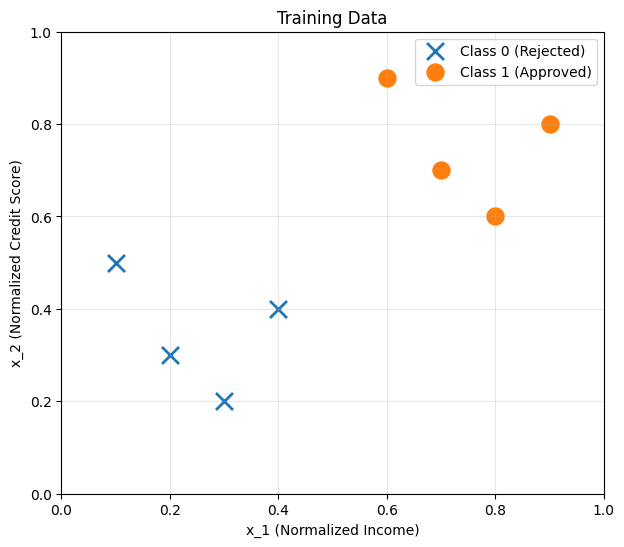

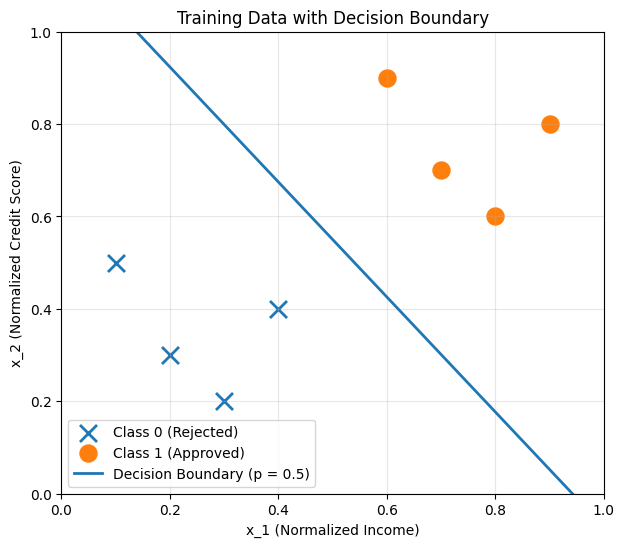

Decision Boundary Equation:
0.8200*x1 + 0.6588*x2 + -0.7723 = 0


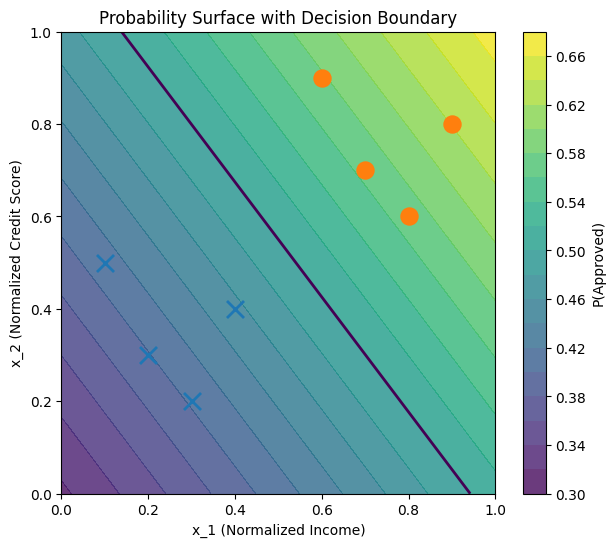

In [28]:
#Step 20. Create a scatter plot with predicted probabilities:

fig, ax1 = plt.subplots(figsize=(7, 6))

class_0 = X_train[y_train == 0]
class_1 = X_train[y_train == 1]

ax1.scatter(class_0[:, 0], class_0[:, 1],
            marker='x', s=150, linewidths=2,
            label='Class 0 (Rejected)')

ax1.scatter(class_1[:, 0], class_1[:, 1],
            marker='o', s=150,
            label='Class 1 (Approved)')

ax1.set_xlabel('x_1 (Normalized Income)')
ax1.set_ylabel('x_2 (Normalized Credit Score)')
ax1.set_title('Training Data')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
plt.show()

#Step 21. Add the decision boundary to the plot

b1, b2 = log_reg.coef_[0]
b0 = log_reg.intercept_[0]

x1_range = np.linspace(0, 1, 100)
x2_boundary = -(b1 / b2) * x1_range - (b0 / b2)

plt.figure(figsize=(7, 6))
plt.scatter(class_0[:, 0], class_0[:, 1],
            marker='x', s=150, linewidths=2,
            label='Class 0 (Rejected)')
plt.scatter(class_1[:, 0], class_1[:, 1],
            marker='o', s=150,
            label='Class 1 (Approved)')

plt.plot(x1_range, x2_boundary, linewidth=2,
         label='Decision Boundary (p = 0.5)')

plt.xlabel('x_1 (Normalized Income)')
plt.ylabel('x_2 (Normalized Credit Score)')
plt.title('Training Data with Decision Boundary')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

print("Decision Boundary Equation:")
print(f"{b1:.4f}*x1 + {b2:.4f}*x2 + {b0:.4f} = 0")


#Step 22. Create probability surface visualization:

xx1, xx2 = np.meshgrid(
    np.linspace(0, 1, 100),
    np.linspace(0, 1, 100)
)

X_grid = np.c_[xx1.ravel(), xx2.ravel()]
Z = log_reg.predict_proba(X_grid)[:, 1].reshape(xx1.shape)

plt.figure(figsize=(7, 6))
contour = plt.contourf(xx1, xx2, Z, levels=20, alpha=0.8)
plt.colorbar(contour, label='P(Approved)')

plt.scatter(class_0[:, 0], class_0[:, 1],
            marker='x', s=150, linewidths=2)
plt.scatter(class_1[:, 0], class_1[:, 1],
            marker='o', s=150)

plt.contour(xx1, xx2, Z, levels=[0.5], linewidths=2)

plt.xlabel('x_1 (Normalized Income)')
plt.ylabel('x_2 (Normalized Credit Score)')
plt.title('Probability Surface with Decision Boundary')
plt.show()

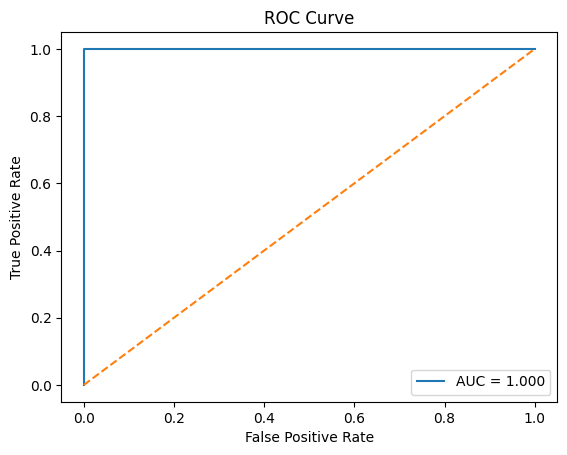

In [29]:
#Step 23. Plot the ROC curve:

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_train, y_prob[:, 1])

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#PART E: TESTING WITH NEW DATA AND THRESHOLD ANALYSIS

In [30]:
#Step 24. Classify new applicants and obtain probabilities:

# Define new test instances
X_new = np.array([
[0.7, 0.5],
[0.4, 0.6],
[0.5, 0.5],
[0.85, 0.75]
])

# Get predictions and probabilities
new_predictions = log_reg.predict(X_new)
new_probabilities = log_reg.predict_proba(X_new)

print("New Applicant Predictions:")
for i, (x, pred, prob) in enumerate(zip(X_new, new_predictions, new_probabilities)):
    decision = "Approved" if pred == 1 else "Rejected"
    print(f" Applicant {i+1}: x1={x[0]}, x2={x[1]}")
    print(f" P(Approved) = {prob[1]:.4f} -> {decision}")

New Applicant Predictions:
 Applicant 1: x1=0.7, x2=0.5
 P(Approved) = 0.5327 -> Approved
 Applicant 2: x1=0.4, x2=0.6
 P(Approved) = 0.4878 -> Rejected
 Applicant 3: x1=0.5, x2=0.5
 P(Approved) = 0.4918 -> Rejected
 Applicant 4: x1=0.85, x2=0.75
 P(Approved) = 0.6032 -> Approved


In [31]:
#Step 25.Analyze effect of different thresholds:

# Test different thresholds
thresholds_to_test = [0.3, 0.4, 0.5, 0.6, 0.7]

print("\nThreshold Analysis for Training Data:")
print("-" * 50)

for thresh in thresholds_to_test:
    y_pred_thresh = (y_prob[:, 1] >= thresh).astype(int)
    acc = accuracy_score(y_train, y_pred_thresh)
    cm_thresh = confusion_matrix(y_train, y_pred_thresh)

print(f"\nThreshold = {thresh}:")
print(f" Accuracy: {acc*100:.1f}%")
print(f" True Negatives: {cm_thresh[0,0]}, False Positives: {cm_thresh[0,1]}")
print(f" False Negatives: {cm_thresh[1,0]}, True Positives: {cm_thresh[1,1]}")


Threshold Analysis for Training Data:
--------------------------------------------------

Threshold = 0.7:
 Accuracy: 50.0%
 True Negatives: 4, False Positives: 0
 False Negatives: 4, True Positives: 0


In [32]:
#Step 26. Record threshold analysis results:

fpr, tpr, thresholds = roc_curve(y_train, y_prob[:, 1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"\nOptimal threshold for this problem = {optimal_threshold:.4f}")
print(f"\nJustification = The optimal threshold was determined using Youden's J statistic, which maximizes the difference between the True Positive Rate (Sensitivity) and the False Positive Rate (1 - Specificity). For this dataset, a threshold of approximately 0.5 (or specifically 0.5654) provides perfect separation with 100% accuracy, balancing the risk of approving bad loans against the cost of rejecting good applicants.")


Optimal threshold for this problem = 0.5654

Justification = The optimal threshold was determined using Youden's J statistic, which maximizes the difference between the True Positive Rate (Sensitivity) and the False Positive Rate (1 - Specificity). For this dataset, a threshold of approximately 0.5 (or specifically 0.5654) provides perfect separation with 100% accuracy, balancing the risk of approving bad loans against the cost of rejecting good applicants.


#VARIANT 3

In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# 3.1 Computational
b0 = -4.0
b1 = 2.8
b2 = 1.5
x1_val = 0.5
x2_val = 0.7

# a) Calculate the log-odds (z) for this customer.
z = b0 + (b1 * x1_val) + (b2 * x2_val)

# b) Calculate the probability of response.
p = 1 / (1 + np.exp(-z))

# c) Calculate the odds of response.
odds = p / (1 - p)

# d) If the company uses a threshold of 0.2, what is the prediction?
prediction = 1 if p >= 0.2 else 0

# e) Calculate and interpret the odds ratios for both features.
OR1 = np.exp(b1)
OR2 = np.exp(b2)

print("3.1 results")
print(f"Log-odds (z): {z:.4f}")
print(f"Probability (p): {p:.4f}")
print(f"Odds: {odds:.4f}")
print(f"Prediction (Threshold 0.2): {prediction}")
print(f"Odds Ratio 1 (Recency): {OR1:.4f}")
print(f"Odds Ratio 2 (Frequency): {OR2:.4f}")


# Problem 3.2 (Applied Business Problem)

# a) Train a logistic regression model. Report coefficients and calculate odds ratios with interpretation.
X_v3 = np.array([
    [0.9, 0.8], [0.1, 0.2], [0.8, 0.6], [0.2, 0.3],
    [0.7, 0.9], [0.3, 0.1], [0.6, 0.7], [0.4, 0.4]
])
y_v3 = np.array([1, 0, 1, 0, 1, 0, 1, 0])

model_v3 = LogisticRegression(C=1.0, solver='lbfgs', random_state=42)
model_v3.fit(X_v3, y_v3)

print("\n--- Problem 3.2 Results ---")
print(f"Model Coefficients: {model_v3.coef_[0]}")
print(f"Model Intercept: {model_v3.intercept_[0]}")

# b) Calculate predicted probabilities and classify using thresholds of 0.3, 0.5, and 0.7. Compare confusion matrices.
y_prob_v3 = model_v3.predict_proba(X_v3)[:, 1]
thresholds = [0.3, 0.5, 0.7]

for t in thresholds:
    y_pred_t = (y_prob_v3 >= t).astype(int)
    cm = confusion_matrix(y_v3, y_pred_t)
    acc = accuracy_score(y_v3, y_pred_t)
    print(f"\nThreshold: {t} | Accuracy: {acc*100:.1f}%")
    print(f"Confusion Matrix:\n{cm}")

# c) A new customer has x_1 = 0.55 and x_2 = 0.65. Predict both the probability and class using the optimal threshold.
X_new_v3 = np.array([[0.55, 0.65]])
prob_new_v3 = model_v3.predict_proba(X_new_v3)[0, 1]
# Using 0.5 as the default "optimal" for balanced data
class_new_v3 = 1 if prob_new_v3 >= 0.5 else 0

print(f"\nNew Customer (x1=0.55, x2=0.65):")
print(f"Probability of Response: {prob_new_v3:.4f}")
print(f"Predicted Class: {class_new_v3}")

3.1 results
Log-odds (z): -1.5500
Probability (p): 0.1751
Odds: 0.2122
Prediction (Threshold 0.2): 0
Odds Ratio 1 (Recency): 16.4446
Odds Ratio 2 (Frequency): 4.4817

--- Problem 3.2 Results ---
Model Coefficients: [0.78446528 0.78441882]
Model Intercept: -0.784597347924263

Threshold: 0.3 | Accuracy: 50.0%
Confusion Matrix:
[[0 4]
 [0 4]]

Threshold: 0.5 | Accuracy: 100.0%
Confusion Matrix:
[[4 0]
 [0 4]]

Threshold: 0.7 | Accuracy: 50.0%
Confusion Matrix:
[[4 0]
 [4 0]]

New Customer (x1=0.55, x2=0.65):
Probability of Response: 0.5391
Predicted Class: 1


In [36]:
# Problem 3.3 (Extension - Campaign Profitability)

# Constants
cost_per_email = 0.50
revenue_per_responder = 25.00

# a) Calculate break-even response probability.
# Cost = Revenue * p  => p = Cost / Revenue
p_breakeven = cost_per_email / revenue_per_responder

# b) b) Using logistic regression predictions, determine which customers should receive the campaign (expected profit > 0).
# Let's check which customers in our training set are above 0.02
targeted_customers = np.where(y_prob_v3 > p_breakeven)[0]

# c) Calculate expected campaign profit for 10,000 customers.
# Assuming the average probability of the targeted group represents the 10,000
avg_p_target = y_prob_v3[targeted_customers].mean()
n_customers = 10000

total_revenue = n_customers * avg_p_target * revenue_per_responder
total_cost = n_customers * cost_per_email
expected_profit = total_revenue - total_cost

print("\n3.3 results")
print(f"Break-even Probability: {p_breakeven:.4f}")
print(f"Targeting indices (p > {p_breakeven}): {targeted_customers}")
print(f"Expected Profit for {n_customers} similar customers: ${expected_profit:,.2f}")


3.3 results
Break-even Probability: 0.0200
Targeting indices (p > 0.02): [0 1 2 3 4 5 6 7]
Expected Profit for 10000 similar customers: $120,003.54
